   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', '

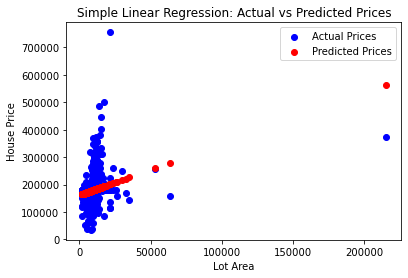

Multiple Linear Regression Mean Squared Error: 3332086780.8257875
Multiple Linear Regression R^2 Score: 0.04452634576429082


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset = pd.read_csv('MLDatasets/HousePricePrediction.csv')

print(dataset.head())
print(dataset.columns)  

print("Missing values in each column:")
print(dataset.isnull().sum())

numeric_cols = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

print("Checking for infinite values:")
infinite_values = np.isinf(dataset[numeric_cols]).sum()
print(infinite_values)

dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.dropna(inplace=True) 

X_simple = dataset[['LotArea']]  
y = dataset['SalePrice']  

X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()

model_simple.fit(X_train_simple, y_train_simple)

y_pred_simple = model_simple.predict(X_test_simple)

mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print(f'Simple Linear Regression Mean Squared Error: {mse_simple}')
print(f'Simple Linear Regression R^2 Score: {r2_simple}')

plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Prices')
plt.scatter(X_test_simple, y_pred_simple, color='red', label='Predicted Prices')
plt.title('Simple Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Lot Area')  
plt.ylabel('House Price')
plt.legend()
plt.show()

X_multiple = dataset[['LotArea', 'MSSubClass', 'OverallCond']] 
y = dataset['SalePrice']

X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

model_multiple = LinearRegression()

model_multiple.fit(X_train_multiple, y_train_multiple)

y_pred_multiple = model_multiple.predict(X_test_multiple)

mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)

print(f'Multiple Linear Regression Mean Squared Error: {mse_multiple}')
print(f'Multiple Linear Regression R^2 Score: {r2_multiple}')